In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/trytry/Database.csv
/kaggle/input/trytry/red_cols.csv
/kaggle/input/trytry/final_ct.csv
/kaggle/input/trytry/df_ct.csv


# Importing libraries + Datset + Variable identification and typecasting.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Filter out any warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/kaggle/input/trytry/final_ct.csv')

df.dropna(inplace=True)


location = ['Latitude', 'Longitude']
grow_time = [ 'Harvest year', 'Sowing month','Harvesting month']
environmental = ['P', 'E', 'PB', 'Tave']
categorical_cols = ['Crop', 'Fertilization CT ', 'N input', 'ST']


def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = [mean-st_dev, mean+st_dev]

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(x = points, y = [0,0], color = 'black', label = "std_dev")
    sns.scatterplot(x = [mini,maxi], y = [0,0], color = 'orange', label = "min/max")
    sns.scatterplot(x = [mean], y = [0], color = 'red', label = "mean")
    sns.scatterplot(x = [median], y = [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))



import seaborn as sns
import matplotlib.pyplot as plt

def UVA_category(data, var_group):
    '''
    Univariate_Analysis_categorical
    takes a group of variables (category) and plot/print all the value_counts and barplot.
    '''
    # setting figure_size
    size = len(var_group)
    plt.figure(figsize=(7*size, 5), dpi=100)

    # for every variable
    for j, i in enumerate(var_group):
        norm_count = data[i].value_counts(normalize=True)
        n_uni = data[i].nunique()

        # Plotting the variable with every information
        plt.subplot(1, size, j + 1)
        sns.barplot(x=norm_count, y=norm_count.index, order=norm_count.index)
        plt.xlabel('fraction/percent', fontsize=20)
        plt.ylabel('{}'.format(i), fontsize=20)
        plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni, norm_count))

    plt.show()

# Example usage:
# Assuming 'data' is your DataFrame and 'var_group' is a list of column names
# UVA_category(data, var_group)




# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))



trimmed_df = df.copy()

import matplotlib.pyplot as plt

def UVA_outlier_remove(data, var_group, trimmed_df):
    size = len(var_group)
    plt.figure(figsize=(7*size, 4), dpi=100)
    for i in var_group:
        # calculating descriptives of variable
        quant25 = data[i].quantile(0.25)
        quant75 = data[i].quantile(0.75)
        IQR = quant75 - quant25
        med = data[i].median()
        whis_low = quant25 - (1.5 * IQR)
        whis_high = quant75 + (1.5 * IQR)

        # Calculating Number of Outliers
        outlier_high = len(data[i][data[i] > whis_high])
        outlier_low = len(data[i][data[i] < whis_low])

        # Filtering outliers from trimmed_df
        trimmed_df = trimmed_df[(trimmed_df[i] < whis_high) & (trimmed_df[i] > whis_low)]
    return trimmed_df


trimmed_df = UVA_outlier_remove(df, environmental, trimmed_df)

trimmed_df = UVA_outlier_remove(trimmed_df, location, trimmed_df)

trimmed_df = UVA_outlier_remove(trimmed_df, grow_time, trimmed_df)

<Figure size 2800x400 with 0 Axes>

<Figure size 1400x400 with 0 Axes>

<Figure size 2100x400 with 0 Axes>

In [4]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
target = ['Yield of CT']
df = trimmed_df
df.rename(columns={'Yield of CT': 'Yield'}, inplace=True)
df.shape
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
one_hot_encoded_df = pd.get_dummies(df, columns=categorical_columns)
one_hot_encoded_df.dtypes
SEED = 42

# Selecting features (X) and target (y)
# Extracting features (X)
predictorVars = one_hot_encoded_df.drop(columns=['Yield'])
# Extracting target variable (y)
targetVar = one_hot_encoded_df['Yield']

# Splitting the dataset into train and test sets (80% train, 20% test)
X_train,X_test,Y_train,Y_test = train_test_split(predictorVars, targetVar, test_size=0.2, random_state=SEED)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
def plot_predictions_vs_truevals(predictions,y_test):    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, predictions, color='blue', label='Predictions vs True Values')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('Predictions vs True Values')
    plt.legend()
    plt.grid(True)
    plt.show()

# Model : Decision Tree

## 1. Scikit-Learn

In [6]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [7]:
SEED = 42

### Import Decision Tree Regressor and fit the model to the training data.

### Without Specifying any hyper-parameter

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
tree = DecisionTreeRegressor(random_state = SEED)

In [9]:
rmse_scores = cross_val_score(tree, X_train, Y_train, cv=5, scoring='neg_root_mean_squared_error')
r2_scores = cross_val_score(tree, X_train, Y_train, cv=5, scoring='r2')

In [10]:
rmseValue = -rmse_scores.mean()
r2Score = r2_scores.mean()

In [11]:
print('Average Root Mean Squared Error:', rmseValue)
print('Average r2_score:', r2Score)


Average Root Mean Squared Error: 2178.603553266085
Average r2_score: 0.6575161236486113


### Specifying Hyper-Parameters


#### 1. Max Depth

In [12]:
tree = DecisionTreeRegressor(max_depth = 8,random_state = SEED)

rmse_scores = cross_val_score(tree, X_train, Y_train, cv=5, scoring='neg_root_mean_squared_error')
r2_scores = cross_val_score(tree, X_train, Y_train, cv=5, scoring='r2')
rmse_scores = cross_val_score(tree, X_train, Y_train, cv=5, scoring='neg_root_mean_squared_error')
r2_scores = cross_val_score(tree, X_train, Y_train, cv=5, scoring='r2')
rmseValue = -rmse_scores.mean()
r2Score = r2_scores.mean()
print('Average Root Mean Squared Error:', rmseValue)
print('Average r2_score:', r2Score)

Average Root Mean Squared Error: 2302.97059628727
Average r2_score: 0.6177048722873824


#### 2. Min Samples before Split

In [13]:
tree = DecisionTreeRegressor(min_samples_split = 20,random_state = SEED)

rmse_scores = cross_val_score(tree, X_train, Y_train, cv=5, scoring='neg_root_mean_squared_error')
r2_scores = cross_val_score(tree, X_train, Y_train, cv=5, scoring='r2')
rmse_scores = cross_val_score(tree, X_train, Y_train, cv=5, scoring='neg_root_mean_squared_error')
r2_scores = cross_val_score(tree, X_train, Y_train, cv=5, scoring='r2')
rmseValue = -rmse_scores.mean()
r2Score = r2_scores.mean()
print('Average Root Mean Squared Error:', rmseValue)
print('Average r2_score:', r2Score)

Average Root Mean Squared Error: 2151.409505858204
Average r2_score: 0.6661111600292471


#### 3.Minimum samples in leaf node

In [14]:
tree = DecisionTreeRegressor(min_samples_leaf = 20,random_state = SEED)

rmse_scores = cross_val_score(tree, X_train, Y_train, cv=5, scoring='neg_root_mean_squared_error')
r2_scores = cross_val_score(tree, X_train, Y_train, cv=5, scoring='r2')
rmse_scores = cross_val_score(tree, X_train, Y_train, cv=5, scoring='neg_root_mean_squared_error')
r2_scores = cross_val_score(tree, X_train, Y_train, cv=5, scoring='r2')
rmseValue = -rmse_scores.mean()
r2Score = r2_scores.mean()
print('Average Root Mean Squared Error:', rmseValue)
print('Average r2_score:', r2Score)

Average Root Mean Squared Error: 2266.0489789805524
Average r2_score: 0.6300061595065146


### HyperParameter Tuning

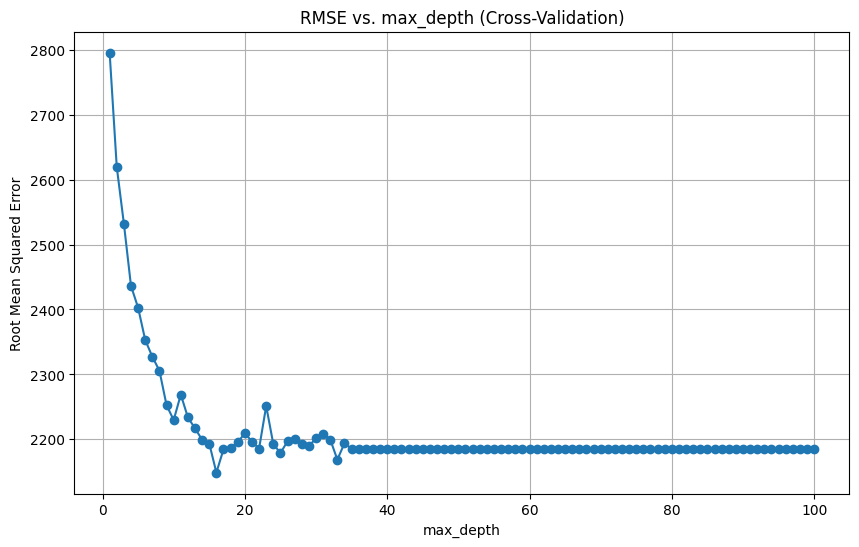

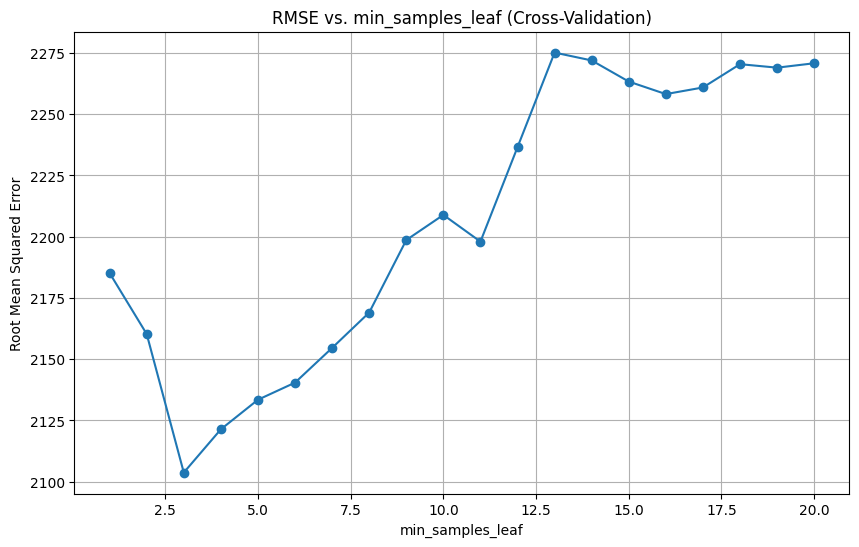

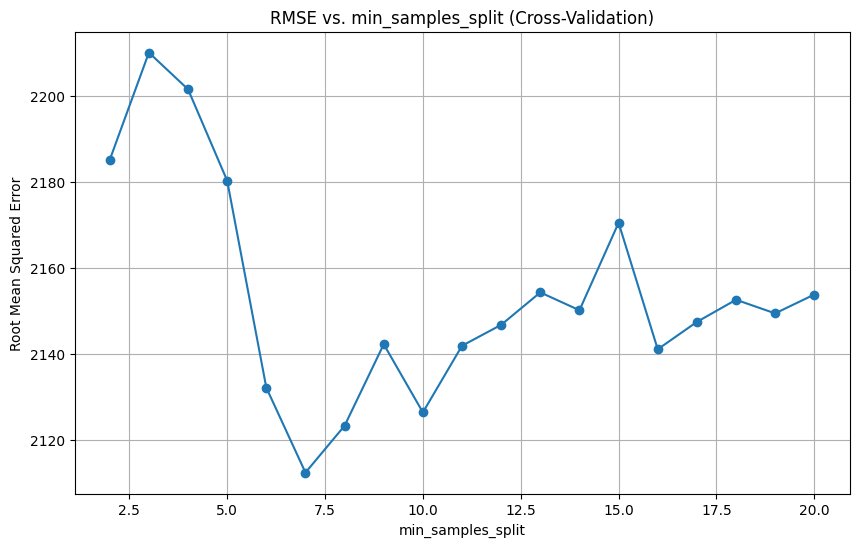

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the range of values for max_depth, min_samples_leaf, and min_samples_split
depths = range(1, 101, 1)
min_samples_leaf_values = range(1, 21)
min_samples_split_values = range(2, 21)

# Initialize lists to store RMSE values
rmse_values_depth = []
rmse_values_leaf = []
rmse_values_split = []

# Perform cross-validation for max_depth
for depth in depths:
    tree = DecisionTreeRegressor(max_depth=depth, random_state=SEED)
    scores = cross_val_score(tree, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_values_depth.append(np.sqrt(-scores.mean()))

# Perform cross-validation for min_samples_leaf
for min_leaf in min_samples_leaf_values:
    tree = DecisionTreeRegressor(min_samples_leaf=min_leaf, random_state=SEED)
    scores = cross_val_score(tree, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_values_leaf.append(np.sqrt(-scores.mean()))

# Perform cross-validation for min_samples_split
for min_split in min_samples_split_values:
    tree = DecisionTreeRegressor(min_samples_split=min_split, random_state=SEED)
    scores = cross_val_score(tree, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_values_split.append(np.sqrt(-scores.mean()))

# Plot RMSE values against max_depth
plt.figure(figsize=(10, 6))
plt.plot(depths, rmse_values_depth, marker='o', linestyle='-')
plt.title('RMSE vs. max_depth (Cross-Validation)')
plt.xlabel('max_depth')
plt.ylabel('Root Mean Squared Error')
plt.grid(True)
plt.show()

# Plot RMSE values against min_samples_leaf
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_values, rmse_values_leaf, marker='o', linestyle='-')
plt.title('RMSE vs. min_samples_leaf (Cross-Validation)')
plt.xlabel('min_samples_leaf')
plt.ylabel('Root Mean Squared Error')
plt.grid(True)
plt.show()

# Plot RMSE values against min_samples_split
plt.figure(figsize=(10, 6))
plt.plot(min_samples_split_values, rmse_values_split, marker='o', linestyle='-')
plt.title('RMSE vs. min_samples_split (Cross-Validation)')
plt.xlabel('min_samples_split')
plt.ylabel('Root Mean Squared Error')
plt.grid(True)
plt.show()


In [16]:
min_depth_indices = np.argsort(rmse_values_depth)[:5]
min_leaf_indices = np.argsort(rmse_values_leaf)[:5]
min_split_indices = np.argsort(rmse_values_split)[:5]
# Print the indices for which minimum RMSE values are AAAA
print("Indices for minimum RMSE values for max_depth:", min_depth_indices)
print("Indices for minimum RMSE values for min_samples_leaf:", min_leaf_indices)
print("Indices for minimum RMSE values for min_samples_split:", min_split_indices)

Indices for minimum RMSE values for max_depth: [15 32 24 16 49]
Indices for minimum RMSE values for min_samples_leaf: [2 3 4 5 6]
Indices for minimum RMSE values for min_samples_split: [ 5  6  8  4 14]


In [17]:
min_depth_values = [depths[i] for i in min_depth_indices[:5]]
print("Values for max_depth with minimum RMSE:", min_depth_values)

# Find the corresponding values for min_samples_leaf
min_leaf_values_depth = [min_samples_leaf_values[i] for i in min_leaf_indices[:5]]
print("Corresponding values for min_samples_leaf:", min_leaf_values_depth)

# Find the corresponding values for min_samples_split
min_split_values_depth = [min_samples_split_values[i] for i in min_split_indices[:5]]
print("Corresponding values for min_samples_split:", min_split_values_depth)

Values for max_depth with minimum RMSE: [16, 33, 25, 17, 50]
Corresponding values for min_samples_leaf: [3, 4, 5, 6, 7]
Corresponding values for min_samples_split: [7, 8, 10, 6, 16]


In [18]:
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeRegressor(random_state=SEED)

### Using above information to shrink sample space

In [19]:
params = {
    'max_depth': min_depth_values,
    'min_samples_leaf': min_leaf_values_depth,
    'min_samples_split': min_split_values_depth,
}

In [20]:
gs = GridSearchCV(dt,param_grid = params,scoring='neg_root_mean_squared_error',cv=5)

In [21]:
gs.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [16, 33, 25, 17, 50],
                         'min_samples_leaf': [3, 4, 5, 6, 7],
                         'min_samples_split': [7, 8, 10, 6, 16]},
             scoring='neg_root_mean_squared_error')

In [22]:
gs.cv_results_['rank_test_score']

array([ 23,  16,  35,  33, 125,  17,  17,  80,  17, 119,  75,  75,  75,
        75, 118,  66,  66,  66,  66,  79, 106, 106, 106, 106, 111,   1,
         4,  20,   7, 120,  27,  27,  51,  27, 115,  36,  36,  36,  36,
        82,  54,  54,  54,  54,  44,  89,  89,  89,  89, 112,   6,   3,
        22,  10, 120,  24,  24,  53,  24, 115,  47,  47,  47,  47,  84,
        54,  54,  54,  54,  44,  89,  89,  89,  89, 112,  34,   9,  15,
        11, 124,  12,  12,  74,  12, 123,  85,  85,  85,  85, 101,  70,
        70,  70,  70,  81, 102, 102, 102, 102, 110,   1,   4,  20,   7,
       120,  27,  27,  51,  27, 115,  36,  36,  36,  36,  82,  54,  54,
        54,  54,  44,  89,  89,  89,  89, 112], dtype=int32)

In [23]:
gs.best_estimator_

DecisionTreeRegressor(max_depth=33, min_samples_leaf=3, min_samples_split=7,
                      random_state=42)

In [24]:
Min_samples_leaf = gs.best_estimator_.min_samples_leaf
Min_samples_split = gs.best_estimator_.min_samples_split
Max_depth = gs.best_estimator_.max_depth

In [25]:
tree = DecisionTreeRegressor(max_depth=Max_depth, min_samples_leaf=Min_samples_leaf, min_samples_split=Min_samples_split,random_state=42)

rmse_scores = cross_val_score(tree, X_train, Y_train, cv=5, scoring='neg_root_mean_squared_error')
r2_scores = cross_val_score(tree, X_train, Y_train, cv=5, scoring='r2')
rmse_scores = cross_val_score(tree, X_train, Y_train, cv=5, scoring='neg_root_mean_squared_error')
r2_scores = cross_val_score(tree, X_train, Y_train, cv=5, scoring='r2')
rmseValue = -rmse_scores.mean()
r2Score = r2_scores.mean()
print('Average Root Mean Squared Error:', rmseValue)
print('Average r2_score:', r2Score)

Average Root Mean Squared Error: 2090.7444791651233
Average r2_score: 0.6848843644734722


### Looking at Feature Importance

In [26]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

# Assuming X_train is a NumPy array and you don't have access to column names directly
# Fit the decision tree model
tree.fit(X_train, Y_train)

# Get feature importances
importances = tree.feature_importances_

# Create a pandas Series with feature importances using numerical indices
num_features = X_train.shape[1]  # Number of features
feature_importance_series = pd.Series(importances, index=range(num_features))

# Sort the feature importances in descending order
sorted_importances = feature_importance_series.sort_values(ascending=False)

# Print the sorted feature importances
print(sorted_importances)


12    0.493356
1     0.115504
2     0.074592
0     0.070530
8     0.056730
6     0.041825
7     0.029124
5     0.025737
29    0.023168
3     0.018435
23    0.011707
11    0.006630
4     0.005928
24    0.005577
13    0.005315
21    0.004216
18    0.003089
27    0.002226
26    0.002001
16    0.001967
15    0.001095
20    0.000640
14    0.000329
22    0.000201
19    0.000057
9     0.000021
17    0.000000
25    0.000000
10    0.000000
28    0.000000
30    0.000000
dtype: float64


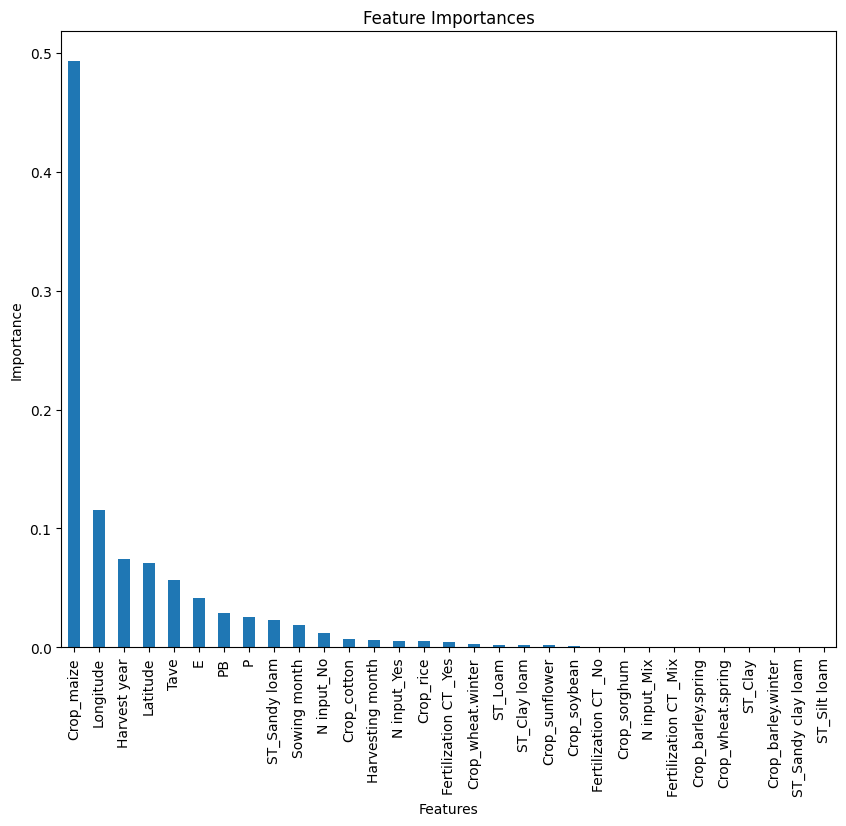

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already calculated feature importances and stored them in a pandas Series
feature_importances = pd.Series(tree.feature_importances_, index=predictorVars.columns).sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

### Testing Model on Test Data

In [42]:
tree = DecisionTreeRegressor(max_depth=Max_depth, min_samples_leaf=Min_samples_leaf, min_samples_split=Min_samples_split,random_state=42)
tree.fit(X_train, Y_train)
predictions = tree.predict(X_test)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test,predictions))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test,predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test,predictions)))
print('r2_score:', metrics.r2_score(Y_test,predictions))

Mean Absolute Error: 1164.6142004920903
Mean Squared Error: 3287225.725431268
Root Mean Squared Error: 1813.0707998948271
r2_score: 0.7696050901606193


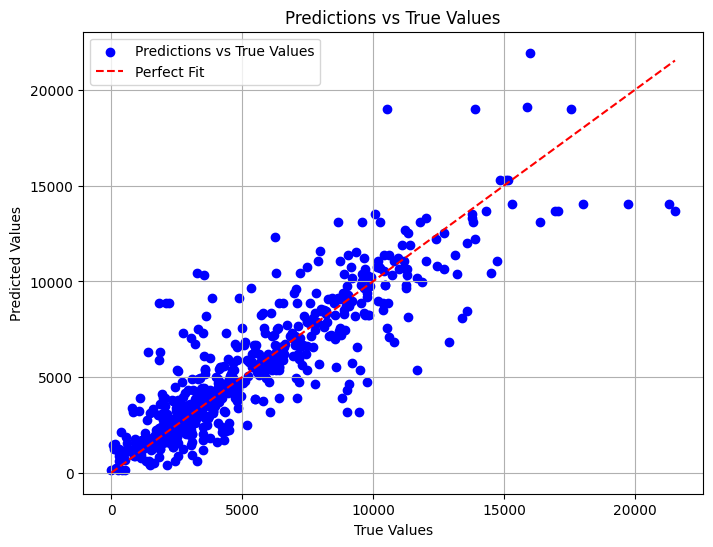

In [43]:
Y_pred_skit = predictions
plot_predictions_vs_truevals(Y_pred_skit,Y_test)

## 2 Self Implementation

### Node Class

In [44]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, var_red=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.var_red = var_red
        
        # for leaf node
        self.value = value

### Tree Class

In [45]:
class DecisionTreeRegressor():
    def __init__(self, min_samples_split=2, min_samples_leaf=1, max_depth=2):
        self.root = None
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree '''
    
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        best_split = {}
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if "var_red" in best_split and best_split["var_red"] > 0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                if len(best_split["dataset_left"]) >= self.min_samples_leaf and len(best_split["dataset_right"]) >= self.min_samples_leaf:
                    return Node(best_split["feature_index"], best_split["threshold"],left_subtree, right_subtree, var_red=best_split["var_red"])

        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_var_red = -float("inf")
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_var_red = self.variance_reduction(y, left_y, right_y)
                    # update the best split if needed
                    if curr_var_red>max_var_red:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["var_red"] = curr_var_red
                        max_var_red = curr_var_red
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def variance_reduction(self, parent, l_child, r_child):
        ''' function to compute variance reduction '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        reduction = np.var(parent) - (weight_l * np.var(l_child) + weight_r * np.var(r_child))
        return reduction
    
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        val = np.mean(Y)
        return val
                
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.var_red)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
        
    def make_prediction(self, x, tree):
        ''' function to predict new dataset '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)
    
    def predict(self, X):
        ''' function to predict a single data point '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
#     def make_prediction(self,X, ind, tree):
#             ''' function to predict new dataset '''

#             if tree.value is not None:
#                 return tree.value

#             if X.iloc[ind].iloc[tree.feature_index] <= tree.threshold:
#                 return self.make_prediction(X,ind, tree.left)
#             else:
#                 return self.make_prediction(X,ind, tree.right)




#     def predict(self, X):
#             ''' function to predict a single data point '''

#             predictions = [self.make_prediction(X,ind, self.root) for ind in range(X.shape[0])]
#             return predictions


In [46]:
Y_train_reshaped = Y_train.values.reshape(-1, 1)

In [47]:
Y_train_reshaped

array([[ 3754.],
       [ 3620.],
       [ 8850.],
       ...,
       [ 2295.],
       [ 7330.],
       [19710.]])

In [48]:
regressor = DecisionTreeRegressor(min_samples_split=Min_samples_leaf, max_depth=Max_depth,min_samples_leaf=Min_samples_leaf)

In [49]:
regressor.fit(X_train,Y_train_reshaped)
Y_pred = regressor.predict(X_test) 
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(Y_test, Y_pred))

1903.0854685813044

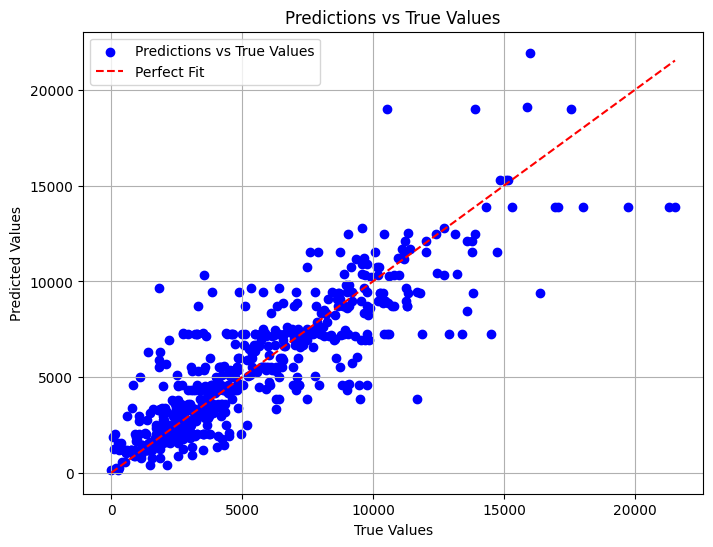

In [50]:
Y_pred_self = Y_pred
plot_predictions_vs_truevals(Y_pred_self,Y_test)